In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import torch
import pandas as pd
import matplotlib.dates as mdates


In [39]:
params = {
    "pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "font.serif": [],
    "font.sans-serif": [],
    "axes.labelsize": 11,
}
plt.rcParams.update(params)
rc("text", usetex=True)

CM = 1 / 2.54
cmap = plt.cm.get_cmap("viridis")

# plt.style.use(['science','nature'])

# Bright color scheme
# color-blind safe
# from Paul Tot's website: https://personal.sron.nl/~pault/
# Set color cycle
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['4477AA', 'EE6677', '228833', 'CCBB44', '66CCEE', 'AA3377', 'BBBBBB'])


# Standard SciencePlots color cycle
mpl.rcParams['axes.prop_cycle'] =  mpl.cycler('color', ['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'])

In [3]:
results_df = pd.read_csv("../data/results/learning_curves_gbm_default_params.csv")
train_sizes = results_df.start.abs()
train_acc = results_df.train_acc
val_acc = results_df.val_acc

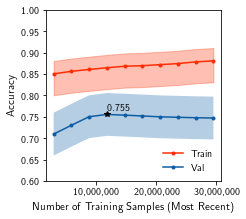

In [62]:
fig, ax = plt.subplots(figsize=(8*CM,8*CM))
# ax.plot(x,y)

ax.plot(train_sizes, train_acc,".-", label = 'Train', color = 'C3')
ax.plot(train_sizes, val_acc,".-", label = 'Val', color="C0")

plt.ylabel('Accuracy') #, fontsize = "small")
plt.xlabel('Number of Training Samples (Most Recent)') # , fontsize = "small")

xmax = train_sizes[np.argmax(val_acc)]
ymax = val_acc.max()
    # text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
if not ax:
    ax=plt.gca()

ax.fill_between(
        train_sizes,
        train_acc + 0.03, # .mean(axis=1) - fit_times.std(axis=1),
        train_acc - 0.05, # fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
        color="C3",
)

ax.fill_between(
        train_sizes,
        val_acc + 0.05, # .mean(axis=1) - fit_times.std(axis=1),
        val_acc - 0.05, # fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
)

# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
# kw = dict(xycoords='data',textcoords="axes fraction",
# arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
# ax.annotate("*", xy=(xmax, ymax))#, xytext=(0.94,0.96),**kw)

# max
ax.plot(xmax, ymax, '*', color="black")
ax.text(xmax+0.01, ymax+0.01, f"{ymax:.3f}")
#ax.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
# plt.title(title, fontsize = 18, y = 1.03)
plt.legend(loc='lower right', frameon=False)
plt.ylim(0.6,1)
# plt.show()
plt.savefig("../reports/Graphs/learning-curves-gradient-boosting.pdf", bbox_inches="tight")

In [35]:
def to_mpl(start: str, end: str):
    mpl_start = mdates.date2num(pd.to_datetime(start))
    mpl_end = mdates.date2num(pd.to_datetime(end))
    return mpl_start, mpl_end - mpl_start


In [36]:
def to_pos(span: tuple):
    return span[0] + 0.5 * span[1]


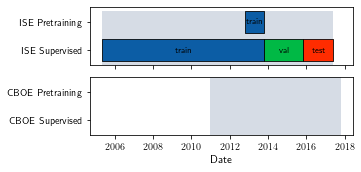

In [64]:
fig, (ax, bx) = plt.subplots(
    2, 1, sharey="none", sharex="col", figsize=(12 * CM, 6 * CM)
)

# ise
ax.broken_barh([to_mpl("2005-05-02", "2017-05-31")], (1, 2.5), facecolors="#D6DCE5")

# ise pretraining
span = [to_mpl("2012-10-23", "2013-10-24")]
ax.broken_barh(span, (2.5, 1), facecolors="C0", edgecolor="black", linewidth=0.8)

ax.text(
    x=to_pos(span[0]),
    y=3,
    s="train",
    ha="center",
    va="center",
    color="black",
    fontsize="small",
)

spans = [
    to_mpl("2005-05-02", "2013-10-24"),
    to_mpl("2013-10-25", "2015-11-05"),
    to_mpl("2015-11-06", "2017-05-31"),
]

# ise supervised
ax.broken_barh(
    spans,
    (1.2, 1),
    facecolors=("C0", "C1", "C3"),
    edgecolor="black",
    linewidth=0.8,
)

# add text labels manually
labels = ["train", "val", "test"]
for i, s in enumerate(spans):
    ax.text(
        x=to_pos(s),
        y=1.7,
        s=labels[i],
        ha="center",
        va="center",
        color="black",
        fontsize="small",
    )

ax.xaxis_date()
plt.setp(ax.get_xticklabels(), visible=True)

# cboe
bx.broken_barh([to_mpl("2011-01-01", "2017-10-31")], (1, 5), facecolors="#D6DCE5")

# Modify y-axis tick labels
bx.set_yticks([1.7, 3], labels=["CBOE Supervised", "CBOE Pretraining"])

ax.set_yticks([1.7, 3], labels=["ISE Supervised", "ISE Pretraining"])

ax.set_ylim(1, 3.7)
bx.set_ylim(1, 3.7)

# into to date
bx.xaxis_date()

plt.xlabel("Date")

# plt.show()
plt.savefig("../reports/Graphs/train-test-split.pdf", bbox_inches="tight")


In [101]:
print(plt.rcParams["axes.linewidth"])


0.8


In [5]:
# code from https://d2l.ai/d2l-en.pdf
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap=cmap):
    num_rows, num_cols, _, _ = matrices.shape
    fig, axes = plt.subplots(
        num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False
    )
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes)
    plt.savefig("../reports/Graphs/attention-maps.pdf", bbox_inches="tight")


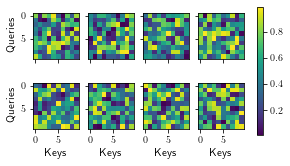

In [6]:
# attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
attention_weights = torch.rand(size=(2, 4, 10, 10))
show_heatmaps(
    attention_weights, xlabel="Keys", ylabel="Queries", figsize=(12 * CM, 6 * CM)
)


In [7]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return pos * angle_rates


def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return pos_encoding


(1, 64, 96)


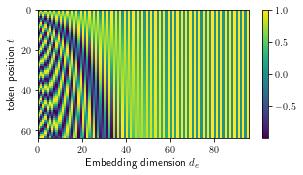

In [8]:
tokens = 64
dimensions = 96


pos_encoding = positional_encoding(tokens, dimensions)
print(pos_encoding.shape)

plt.figure(figsize=(12 * CM, 6 * CM))
plt.pcolormesh(pos_encoding[0], cmap=cmap)
plt.xlabel("Embedding dimension $d_e$")
plt.xlim((0, dimensions))
plt.ylim((tokens, 0))
plt.ylabel("token position $t$")
plt.colorbar()
plt.savefig("../reports/Graphs/positional-encoding.pdf", bbox_inches="tight")
